# Tarea 1: Programar DFT, zero padding y comparación entre DFT y FFT

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi

def dft(vs, dt):
    ns = len(vs)
    ks = np.arange(ns)
    ns_coef = np.arange(ns)
    vsdf = np.zeros(ns, dtype=complex)
    
    for k in ks:
        vsdf[k] = np.sum(vs * np.exp(-1j * 2 * np.pi * ns_coef * k / ns) * dt)
    
    return vsdf

def idft(vsdf, dt):
    ns = len(vsdf)
    ns_coef = np.arange(ns)
    vs = np.zeros(ns, dtype=complex)
    
    for n in range(ns):
        vs[n] = np.sum(vsdf * np.exp(1j * 2 * np.pi * ns_coef * n / ns)) * dt / ns
    
    return vs

# Función para redondear partes reales e imaginarias cercanas a cero
def redondear_cercanas_a_cero(arr, tolerancia=1e-10):
    arr_real = np.real(arr)
    arr_imag = np.imag(arr)
    arr_real[np.abs(arr_real) < tolerancia] = 0
    arr_imag[np.abs(arr_imag) < tolerancia] = 0
    return arr_real + 1j * arr_imag

# Definimos los parámetros iniciales del problema o los pedimos al usuario por consola
""" def ingresar_valores():
    
    #Función para solicitar al usuario que ingrese v0, tmax1, tmax2 y tmax3.
    
    v0 = float(input("Ingrese el valor de v0: "))
    tmax1 = float(input("Ingrese el valor de tmax1: "))
    tmax2 = float(input("Ingrese el valor de tmax2: "))
    ts = float(input("Ingrese el valor de ts: "))
    dt = float(input("Ingrese el valor de dt: "))

    return v0, tmax1, tmax2, ts, dt

# Llamada a la función para ingresar los valores y guardarlos en variables
v0, tmax1, tmax2, ts, dt  = ingresar_valores()  """

# Con estos parámetros, calculamos y definimos otros necesarios
def calcular_parametros(*args):
    """ 
    - *args: Lista de tmax y dt.
    """
    resultados = []
    
    for tmax, dt in args:
        ntm = int(tmax/dt)
        dftmax = 1/tmax
        nfmtm = int(ntm/2 + 1)
        frtm = np.arange(0, nfmtm) * dftmax
        resultados.append((ntm, dftmax, nfmtm, frtm))
    
    return resultados

# Llamamos a la función calcular_parámetros y almacenamos los valores en un vector

# Creamos el pulso rectangular con lo que ya sabemos
def crear_pulso_rectangular(v0, tmax, dt, ts):
    """      
    - tmax: Valor de tmax.
    - dt: Incremento de tiempo.
    - ts: Duración del pulso rectangular.
    - v0: Valor del pulso rectangular.   
    
    """
    tiempo = np.arange(0, tmax, dt)
    pulso_rectangular = np.zeros_like(tiempo)
    pulso_rectangular[(tiempo >= 0) & (tiempo < ts)] = v0
    
    return tiempo, pulso_rectangular

# Llamamos a la función crear_pulso_rectangular para crear el vector del tiempo y del pulso, coordenadas de los dos ejes

# Transformada usando el algoritmo

# Graficamos los pulsos rectangulares
def graficar_pulso_rectangular(*args):
    """
    Grafica señales de pulso rectangular en función del tiempo.

    - *args Lista de tuplas de la forma (tiempo, pulso_rectangular, color, etiqueta).
    """
    plt.figure(figsize=(10, 5))

    for tiempo, pulso_rectangular, color, etiqueta in args:
        plt.plot(tiempo, pulso_rectangular, color=color, label=etiqueta)

    plt.xlim(0,400)
    plt.title('Señal de Pulso Rectangular')
    plt.xlabel('Tiempo (segundos)')
    plt.ylabel('Amplitud (V)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Usamos la función definida para graficar

# Transformada teórica de un pulso rectangular, definición
def transf_teorica_pulso(f,v0,ts):
    vt=v0*ts*np.exp(-2.*np.pi*1j*f*ts/2.)*np.sinc(2.*f*ts/2.)
    return vt

# Frecuencias entre 0 - fmax

# Creación de una función genérica que grafique  un numero de señales arbitrario siendo la primera la señal teórica!
def graficar_general_N_module(frecsteo, Tteo_pulso, *args):
    """
    Grafica la transformada de Fourier de un pulso de entrada y sus DFTs con respecto a la frecuencia.   
    - frecsteo  Frecuencia de muestreo.
    - Tteo_pulso  Transformada de Fourier teórica del pulso de entrada.
    - *args  Lista de tuplas de la forma (frtm, Tvetm, nfmt)

    """
    plt.figure(figsize=(10, 5))
    plt.plot(frecsteo*1E3, abs(Tteo_pulso), c='g', label='DFT Teórica')

    for i, (frtm, Tvetm, nfmt) in enumerate(args):
        plt.plot(frtm*1E3, np.abs(Tvetm[0:nfmt]), label=f'DFT N={nfmt}', linestyle=['-', '--', '-.', ':'][i % 4])

    plt.xlim(0, 10)
    plt.xlabel('f (mHz)')
    plt.ylabel('DFT (V s)')
    plt.legend(loc=1)
    plt.grid()
    plt.title('Transformada del pulso de entrada')
    plt.show()

# El valor de resultados es una matrix, o una lista de tuplas, es decir, tenemos la primera tupla que es para tmax1 con sus 4 valores,
# Para acceder a la primera tupla tenemos el indice 0, y sus correspondientes valores de los vectores 0, 1, 2 y 3

# Tarea 2: Principio de Incertidumbre

In [2]:
#Transformada para el pulso con 128 y 64 segundos de ancho de banda

def graficar_transformada_teorica(*args):

    plt.figure(figsize=(10, 5))

    for i, (frecsteo, Tteo_pulso, ts) in enumerate(args):
        plt.plot(frecsteo*1E3, np.abs(Tteo_pulso),label=f'DFT acnhura ts={ts}', linestyle=['-', '--', '-.', ':'][i % 4])

    plt.xlim(0, 50)
    plt.xlabel('f (mHz)')
    plt.ylabel('DFT (V s)')
    plt.legend(loc=1)
    plt.grid()
    plt.title('Transformada del pulso de entrada')
    plt.show()

# Tarea 3: Teorema de muestreo, frecuencia de Nyquist y aliasing

In [3]:
# Definimos dos periodos de muestreo nuevos y el que ya hemos usado de 2 segundos

# Llamamos a la función calcular_parametros para los 3 valores de periodos de muestreo y el tiempo máximo del pulso tmax1

# Definimos otra función con una nueva funcionalidad, las graficas quedan mas bonitas y plotean el módulo y el argumento
def graficar_general_N_mod_fase(Tteo_pulso, frecsteo, *args):
    fig, axs = plt.subplots(2, 1, figsize=(10, 8))
    
    # Primero: Magnitud de la DFT
    axs[0].plot(frecsteo*1E3, np.abs(Tteo_pulso), c='m', label='DFT Teórica')
    for i, (frdt,Tvetm, nfmt, dt) in enumerate(args):
        axs[0].plot(frdt*1E3, np.abs(Tvetm[0:nfmt]), label=f'DFT con muestreo dt={dt}', linestyle=['-', '--', '-.', ':'][i % 4])

    axs[0].set_xlim(0, 100)
    axs[0].set_ylim(0, 300)
    axs[0].set_xlabel('f (mHz)')
    axs[0].set_ylabel('Magnitud de DFT (V s)')
    axs[0].legend(loc=1)
    axs[0].grid()
    axs[0].set_title('Transformada módulo del voltaje de entrada')

    # Segundo: Fase de la DFT
    axs[1].plot(frecsteo*1E3, np.angle(Tteo_pulso), c='m', label='DFT Teórica')
    for i, (frdt,Tvetm, nfmt, dt) in enumerate(args):
        axs[1].plot(frdt*1E3, np.angle(Tvetm[0:nfmt]), label=f'DFT con muestreo dt={dt}', linestyle=['-', '--', '-.', ':'][i % 4])

    axs[1].set_xlim(0, 25)
    axs[1].set_xlabel('f (mHz)')
    axs[1].set_ylabel('Fase de DFT (rad)')
    axs[1].legend(loc=2)
    axs[1].grid()
    axs[1].set_title('Transformada del ángulo del voltaje de entrada')

    plt.tight_layout()
    plt.show()

# Para llamar a esta funcion hace falta primero llamar a la teórica y luego al numero arbitrario de transfornmadas que qureamos,
# en forma de lista, y especificando la transformada, las frecuencias y el entorno a que graficamos y el periodo de muestreo

# Voltaje teórico del condensador en el proceso de carga y descarga
def vc(tis,v0,ts,tau):
    val=np.empty(len(tis))
    for i,ti in enumerate(tis):
        if(ti<=ts and ti>=0):
            val[i]=v0*(1-np.exp(-ti/tau))
        else:
            val[i]=v0*(np.exp(ts/tau)-1)*np.exp(-ti/tau)
    return val

# DFT en el condensador

# Tarea 4: Principio de causalidad


In [4]:
# Añadimos una muestra más al pulso que queramos analizar el principio de causalidad, en nuestro caso, el que esta muestreado con dt3

# Tarea 5: Función de transferencia y diagramas de Bode

In [5]:
# Definición de la función de transferencia
def ftra(u):
    return 1/(1+1j*u)

fc=1/(2*pi*tau)

# Normalizamos las frecuencias teóricas 


# Creamos la función de transferencia con el especto de frecuencias normalizada


# Diagrama de Bode

# Función general para calcular los diagramas de Bode, pasándole la DFT del condensador y de entrada
def calcular_ftradt(*args):
    """ 
    - *args: Lista de Tvcdt,Tvetm.
    """
    func_transf = []
    
    for Tvcdt, Tvetm in args:
        ftradt=Tvcdt/Tvetm
        ftradtdb=20*np.log10(abs(ftradt))
        ftradtfa=np.angle(ftradt)        
        func_transf.append((ftradtdb, ftradtfa))
    
    return func_transf


# Normalizamos el espectro de las frecuencias para las 3 DFT

# Recuperamos los valores

# Función que con lo que tenemos, grafica los diagramas de Bode
def graficar_Bode_teo(usteo, Tteo_pulso, *args):

    plt.figure(figsize=(10, 5))
    
    if Tteo_pulso == 'ftrateodb':
        plt.semilogx(usteo[1:], ftrateodb[1:], c='r', label='Bode Teórico')
        plt.ylabel('T (dB)')
    elif Tteo_pulso == 'ftrateofa':        
        plt.semilogx(usteo[1:], ftrateofa[1:], c='r', label='Bode Teórico')
        plt.ylabel('T (rad)')
    else:
        raise ValueError("El parámetro 'Tteo_pulso' debe ser 'ftrateodb' o 'ftrateofa'")
   
    
    for i, (usdt, ftradtdb, nfmdt, dt) in enumerate(args):
        plt.semilogx(usdt, (ftradtdb[0:nfmdt]), label=f'Bode con dt={dt}', linestyle=['-', '--', '-.', ':'][i % 4])

    plt.xlabel('f/fc')
    plt.legend()
    plt.grid()
    plt.title('Diagrama de Bode')
    plt.show()

# Tiene un condicional para graficar el módulo o el argumento

NameError: name 'tau' is not defined

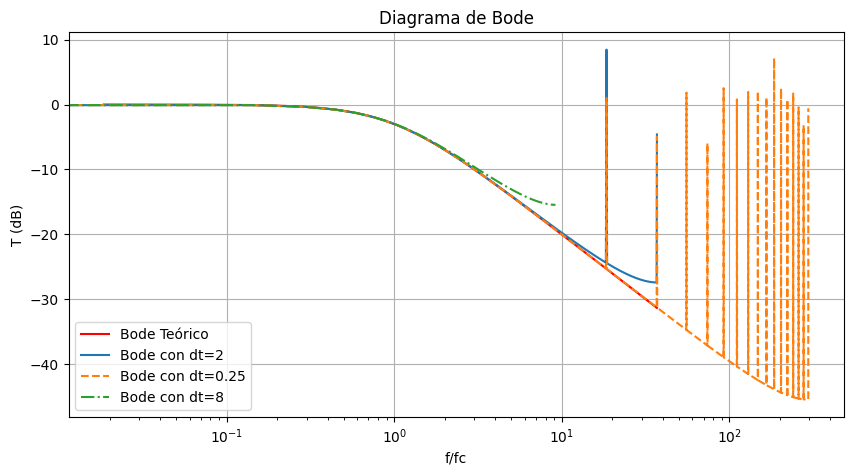

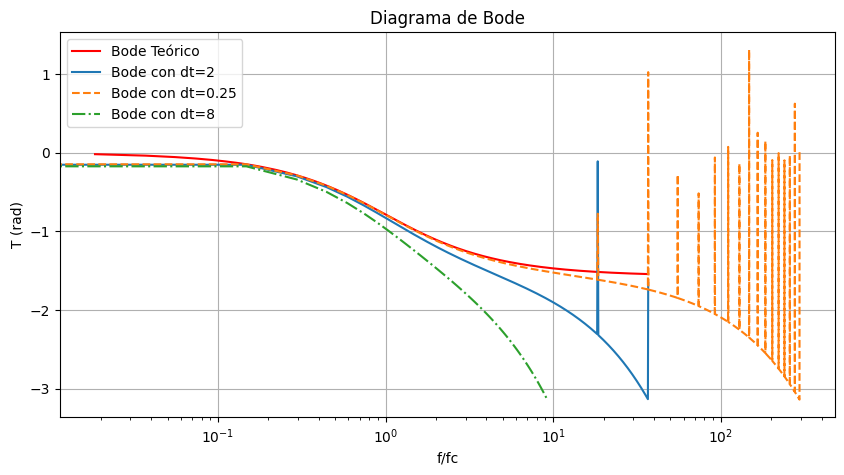

# Tarea adicional

In [ ]:
""" #Programamos  vcdt1, tiempo1, pulso_rectangular1, icdt1. Ya estan todos falta la intensidad, que con la fórmula

def ic(tis,v0,ts,tau):
    val=np.empty(len(tis))
    for i,ti in enumerate(tis):
        if(ti<=ts and ti>=0):
            val[i]=v0/r*(np.exp(-ti/tau))
        else:
            val[i]=-v0/r*(np.exp(ts/tau)-1)*np.exp(-ti/tau)
    return val

icdt1=ic(tiempo1,1000*v0,ts,tau)

graficar_pulso_rectangular((tiempo1,pulso_rectangular1,'blue', 'Pulso Rectangular'),(tiempo1,vcdt1,'red', 'Voltaje en condensador'))
graficar_pulso_rectangular((tiempo1, icdt1, 'green', 'Intensidad en el condensador'))  """


" #Programamos  vcdt1, tiempo1, pulso_rectangular1, icdt1. Ya estan todos falta la intensidad, que con la fórmula\n\ndef ic(tis,v0,ts,tau):\n    val=np.empty(len(tis))\n    for i,ti in enumerate(tis):\n        if(ti<=ts and ti>=0):\n            val[i]=v0/r*(np.exp(-ti/tau))\n        else:\n            val[i]=-v0/r*(np.exp(ts/tau)-1)*np.exp(-ti/tau)\n    return val\n\nicdt1=ic(tiempo1,1000*v0,ts,tau)\n\ngraficar_pulso_rectangular((tiempo1,pulso_rectangular1,'blue', 'Pulso Rectangular'),(tiempo1,vcdt1,'red', 'Voltaje en condensador'))\ngraficar_pulso_rectangular((tiempo1, icdt1, 'green', 'Intensidad en el condensador'))  "